In [1]:
#importing some necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
#reading the data through pandas
pd.set_option('display.max_columns', 35)
df = pd.read_excel('Data_Trains.xls')
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [3]:
# Checking if any null values are there or not in any of the fields in the data
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
df = df.dropna(axis = 0)

In [5]:
df.shape

(10682, 11)

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [8]:
#Checking the uniqueness of a value
#for eg: there are 550 datas where the duration is 2h 50m. 
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
36h 25m      1
35h 35m      1
35h 20m      1
41h 20m      1
30h 10m      1
Name: Duration, Length: 368, dtype: int64

In [9]:
# Same as Duration
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

# date_of_journey


In [10]:
# date_of_journey is the date on which you started the journey...
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [11]:
# Creating a field name 'doj' in which we will keep the information of
# Date_of_Journey in date-time format
df['doj'] = pd.to_datetime(df.Date_of_Journey)
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,doj
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019-01-05


In [12]:
# Splitting the dtae-time format in month and day respectively. 
df['doj_month'] = df.doj.dt.month
df['doj_day'] = df.doj.dt.day
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,doj,doj_month,doj_day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019-03-24,3,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019-01-05,1,5


In [13]:
#dropped the previous field as we no longer need it becuase we have kept the info in the form of month and day 

df = df.drop(['Date_of_Journey', 'doj'], axis='columns')
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,doj_month,doj_day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


# Dep_Time:

In [14]:
#departure time is the time when the flight takes off.
# In a similar manner we are splittng Dep_Time also. 
df['DT'] = pd.to_datetime(df.Dep_Time)
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,doj_month,doj_day,DT
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,2021-01-04 22:20:00
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2021-01-04 05:50:00


In [15]:
df['DT_hrs'] = df.DT.dt.hour
df['DT_mins'] = df.DT.dt.minute
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,doj_month,doj_day,DT,DT_hrs,DT_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,2021-01-04 22:20:00,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2021-01-04 05:50:00,5,50


In [16]:
df = df.drop(['DT','Dep_Time'], axis = 'columns')
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,doj_month,doj_day,DT_hrs,DT_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


# Arrival_Time:

In [17]:
# Arrival time is the time when the flight lands in destination.
# In a same way, as above two, we are splitting Arrival_Time 
df['AT'] = pd.to_datetime(df.Arrival_Time)
df['AT_hrs'] = df.AT.dt.hour
df['AT_mins'] = df.AT.dt.minute
df.head(2)



,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,doj_month,doj_day,DT_hrs,DT_mins,AT,AT_hrs,AT_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20,2021-03-22 01:10:00,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,2021-01-04 13:15:00,13,15


In [18]:
df = df.drop(['Arrival_Time', 'AT'], axis = 'columns')
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,doj_month,doj_day,DT_hrs,DT_mins,AT_hrs,AT_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


# Duration:

In [19]:
#Duration is the time taken by the flight to reach the destination.
duration = list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = "0h " + duration[i]
duration_hrs = []
duration_mins = []
for i in range(len(duration)):
    duration_hrs.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))


In [20]:
df['duration_hrs'] = duration_hrs
df['duration_mins'] = duration_mins
df = df.drop(['Duration'], axis = 'columns')

In [21]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,doj_month,doj_day,DT_hrs,DT_mins,AT_hrs,AT_mins,duration_hrs,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


# Categorical fields: airline,source,destination


In [22]:
#Airline are the companies basically.
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

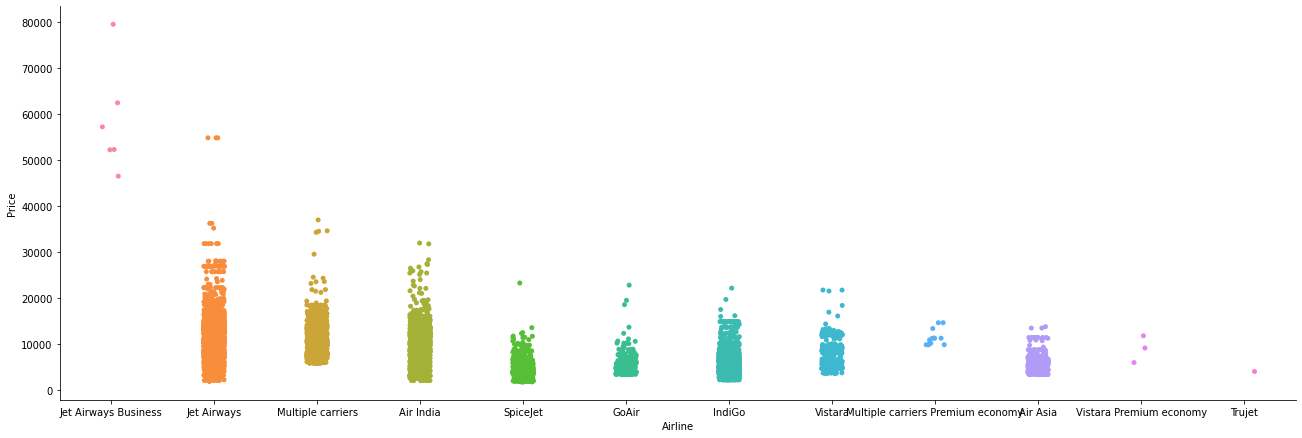

In [23]:
# this shows that other than jet airways business, all other airlines have almost equal prices...
sns.catplot(y = 'Price', x = 'Airline', data = df.sort_values('Price', ascending = False),kind = 'strip', height = 6, aspect = 3)


# performing one hot encoding:

In [24]:
airline = df[['Airline']]
airline = pd.get_dummies(airline)
airline.head(2)

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0


In [25]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

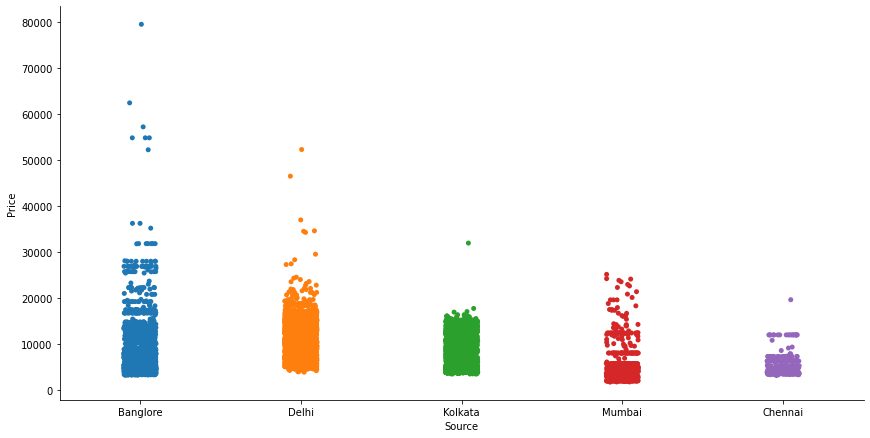

In [26]:
# So, we got to know that, only a few tickets from bangalore is costly..
# other than that all the source has the same amount of price.
sns.catplot(y = 'Price', x = 'Source', data = df.sort_values('Price', ascending = False), kind = 'strip', height = 6, aspect = 2)

In [27]:
source = df[['Source']]
source = pd.get_dummies(source)
source.head(2)

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0


In [28]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

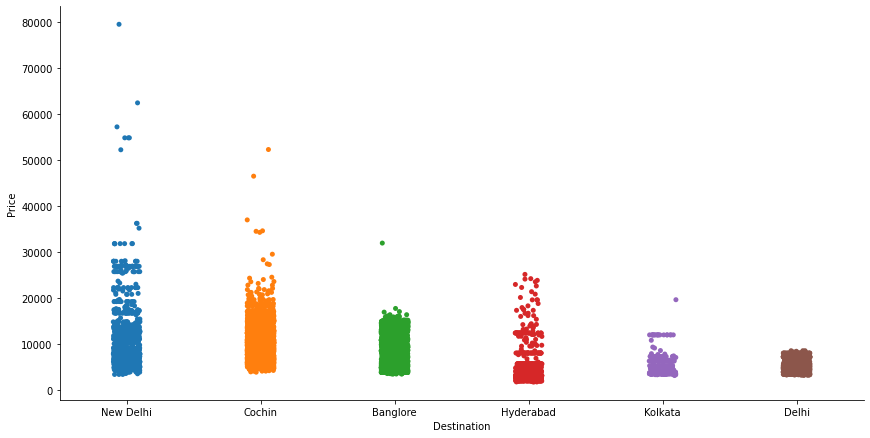

In [29]:
sns.catplot(y = 'Price', x = 'Destination', data = df.sort_values('Price', ascending = False), kind = 'strip', height =6, aspect =2)

In [30]:
destination = df[['Destination']]
destination = pd.get_dummies(destination)
destination.head(2)

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0


In [31]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,doj_month,doj_day,DT_hrs,DT_mins,AT_hrs,AT_mins,duration_hrs,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [32]:
# As additional info has more than 70% as no info, we are dropping it
# Also, route is same as total_stops, so we are dropping route too..
df = df.drop(['Route'], axis = 'columns')
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,doj_month,doj_day,DT_hrs,DT_mins,AT_hrs,AT_mins,duration_hrs,duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [33]:
df = df.drop(['Additional_Info'], axis = 'columns')
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,doj_month,doj_day,DT_hrs,DT_mins,AT_hrs,AT_mins,duration_hrs,duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25


# Total_Stops:

In [34]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

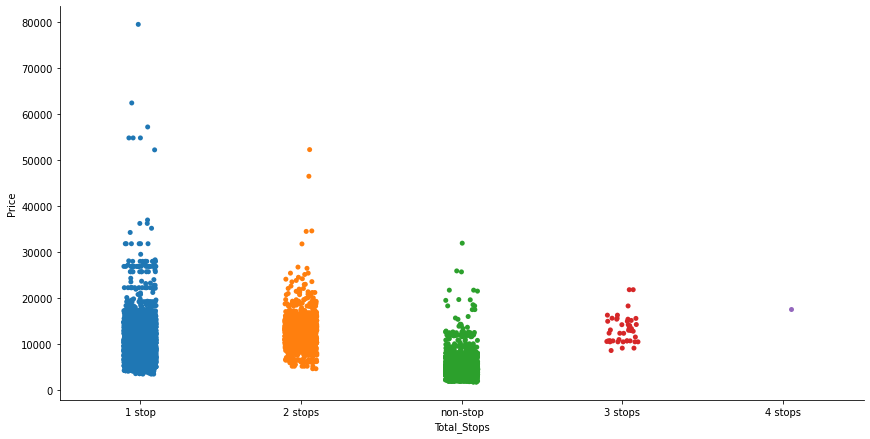

In [35]:
sns.catplot(y = 'Price', x = 'Total_Stops', data = df.sort_values('Price', ascending = False), height = 6, aspect = 2)

In [36]:
df.replace({'non-stop' : 0 , '1 stop' : 1 , '2 stops' : 2 ,'3 stops' : 3, '4 stops' : 4}, inplace = True)
df.head(2)
           

,Airline,Source,Destination,Total_Stops,Price,doj_month,doj_day,DT_hrs,DT_mins,AT_hrs,AT_mins,duration_hrs,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25


In [37]:
df['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [38]:
df = df.dropna(axis = 0)

In [39]:
df.isnull().sum()

Airline          0
Source           0
Destination      0
Total_Stops      0
Price            0
doj_month        0
doj_day          0
DT_hrs           0
DT_mins          0
AT_hrs           0
AT_mins          0
duration_hrs     0
duration_mins    0
dtype: int64

In [40]:
df_new = pd.concat([airline, source, destination, df], axis = 'columns')
df_new.head(2)

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline,Source,Destination,Total_Stops,Price,doj_month,doj_day,DT_hrs,DT_mins,AT_hrs,AT_mins,duration_hrs,duration_mins
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,2,50
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25


In [41]:
df_new.columns

Index(['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Airline', 'Source', 'Destination',
       'Total_Stops', 'Price', 'doj_month', 'doj_day', 'DT_hrs', 'DT_mins',
       'AT_hrs', 'AT_mins', 'duration_hrs', 'duration_mins'],
      dtype='object')

In [42]:
df_new = df_new.drop(['Destination', 'Airline', 'Source'], axis = 'columns')
df_new

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops,Price,doj_month,doj_day,DT_hrs,DT_mins,AT_hrs,AT_mins,duration_hrs,duration_mins
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,3897,3,24,22,20,1,10,2,50
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2,7662,1,5,5,50,13,15,7,25
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,13882,9,6,9,25,4,25,19,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,6218,12,5,18,5,23,30,5,25
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,4107,9,4,19,55,22,25,2,30
10679,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,4145,4,27,20,45,23,20,2,35
10680,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,7229,4,27,8,20,11,20,3,0
10681,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,12648,1,3,11,30,14,10,2,40


In [43]:
df_new = df_new.drop(['Airline_Trujet'], axis = 'columns')
df_new.head(2)

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops,Price,doj_month,doj_day,DT_hrs,DT_mins,AT_hrs,AT_mins,duration_hrs,duration_mins
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,3897,3,24,22,20,1,10,2,50
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2,7662,1,5,5,50,13,15,7,25


In [44]:
x = df_new.drop(['Price'], axis = 'columns')
x.head(2)

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops,doj_month,doj_day,DT_hrs,DT_mins,AT_hrs,AT_mins,duration_hrs,duration_mins
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,3,24,22,20,1,10,2,50
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2,1,5,5,50,13,15,7,25


In [45]:
x.isnull().sum()

Airline_Air Asia                             0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Banglore                              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkata                               0
Source_Mumbai                                0
Destination_Banglore                         0
Destination_Cochin                           0
Destination_Delhi                            0
Destination_Hyderabad                        0
Destination_Kolkata                          0
Destination_N

In [46]:
y = df.Price
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
reg = LinearRegression()

# Test Data:


In [49]:
test_data = pd.read_excel('Testss_set.xls')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [50]:
print("Test data Info")

print(test_data.info())

print()
print()

print("Null values :")

test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")

print(test_data["Airline"].value_counts())
airline = pd.get_dummies(test_data["Airline"])

print()

print("Source")

source = test_data[['Source']]
source = pd.get_dummies(source)

print()

print("Destination")

print(test_data["Destination"].value_counts())
destination = pd.get_dummies(test_data["Destination"])

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([airline, source, destination, test_data], axis = 1)


print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64
Airline
Jet Airways                          897
In

In [51]:
data_test.head(2)

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Airline,Source,Destination,Total_Stops,Journey_month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,IndiGo,Kolkata,Banglore,1,5,12,6,20,10,20,4,0


In [52]:
data_test = data_test.drop(['Airline', 'Source', 'Destination'], axis = 'columns')
data_test.head(2)

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Journey_month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,6,6,17,30,4,25,10,55
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,5,12,6,20,10,20,4,0


In [53]:
data_test.columns

Index(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Source_Banglore', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Banglore', 'Cochin',
       'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi', 'Total_Stops',
       'Journey_month', 'Journey_day', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [54]:
df_new.columns

Index(['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Total_Stops', 'Price', 'doj_month', 'doj_day', 'DT_hrs', 'DT_mins',
       'AT_hrs', 'AT_mins', 'duration_hrs', 'duration_mins'],
      dtype='object')

# Feature Selection:

In [55]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

<AxesSubplot:>

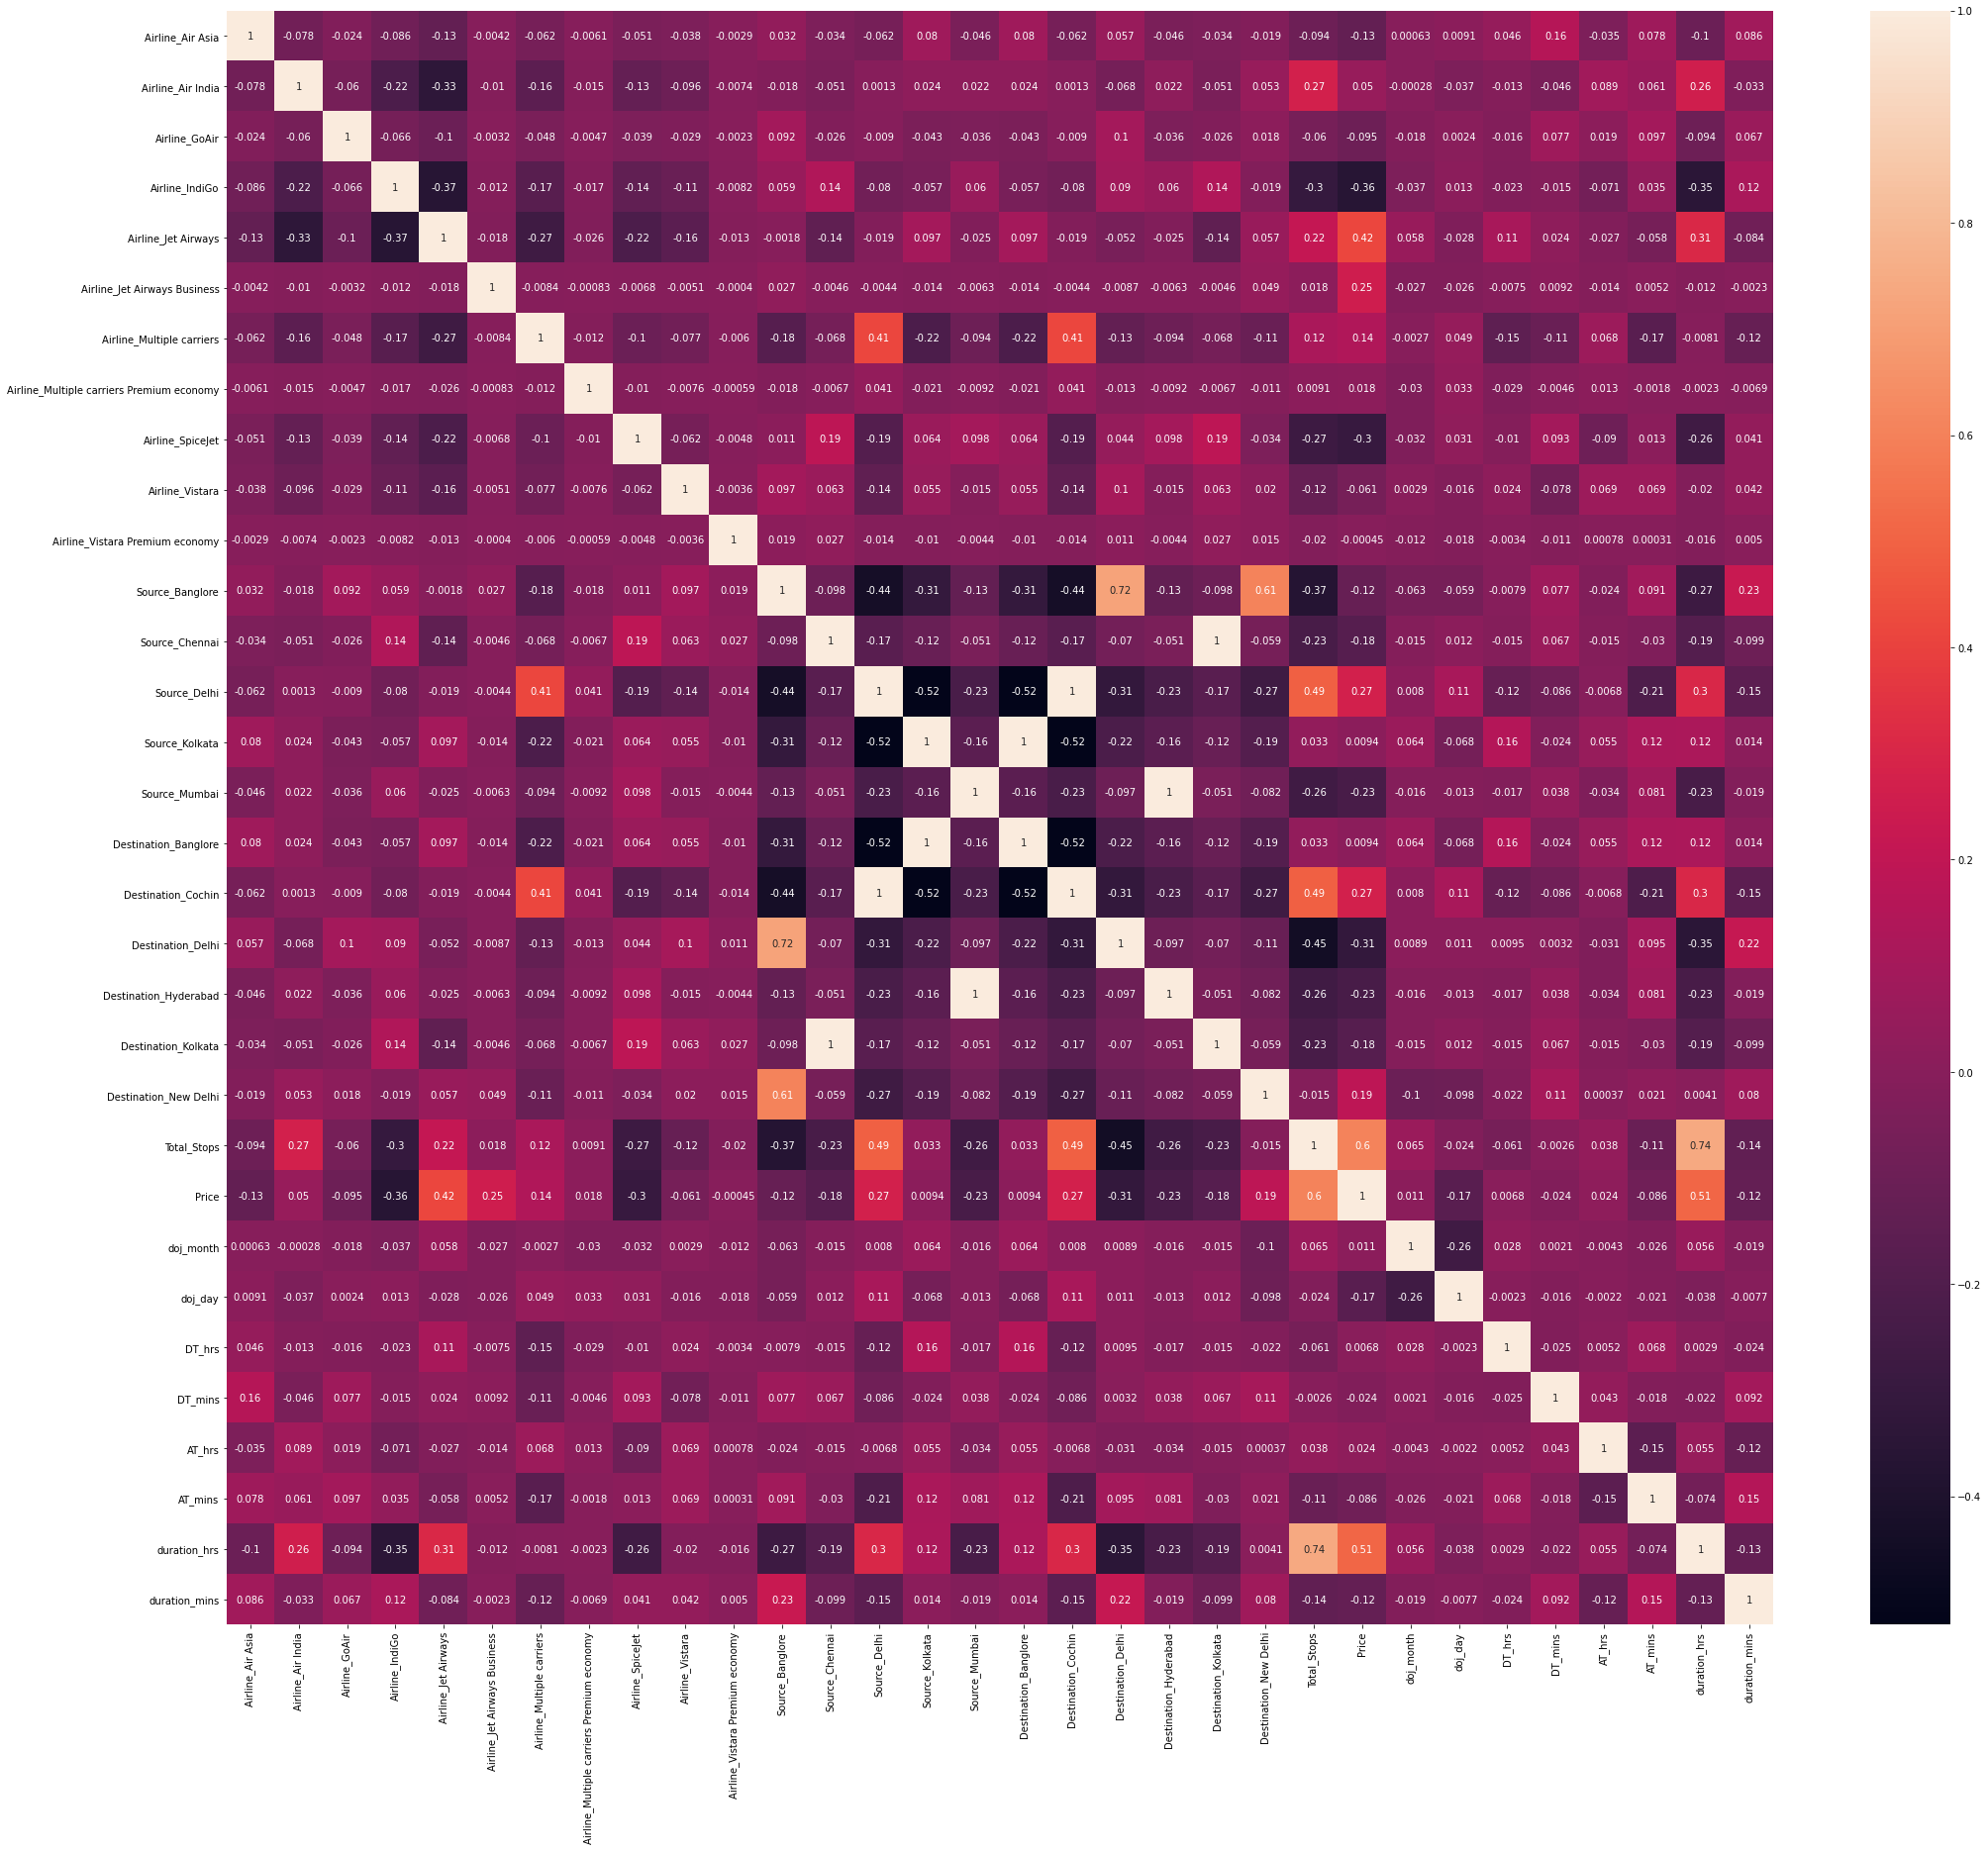

In [56]:
plt.figure(figsize = (35,30))
sns.heatmap(df_new.corr(),annot = True)

In [57]:
x.isnull().sum()

Airline_Air Asia                             0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Banglore                              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkata                               0
Source_Mumbai                                0
Destination_Banglore                         0
Destination_Cochin                           0
Destination_Delhi                            0
Destination_Hyderabad                        0
Destination_Kolkata                          0
Destination_N

In [58]:
reg.fit(x,y)

LinearRegression()

In [59]:
reg.predict(data_test.head(2))

array([12147.39165248,  7392.2665293 ])

In [60]:
data_test.head(2)

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Total_Stops,Journey_month,Journey_day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,6,6,17,30,4,25,10,55
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,5,12,6,20,10,20,4,0


# fitting the model through randomForestRegressor:

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
xtr,xts,ytr,yts = train_test_split(x,y, test_size = 0.3, random_state = 10)

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
model = RandomForestRegressor()

In [65]:
model.fit(xtr,ytr)

RandomForestRegressor()

In [66]:
prediction = model.predict(xts)

In [67]:
model.score(xtr,ytr)

0.95791904783641

In [68]:
# Got almost 80% accuracy..
model.score(xts,yts)

0.7901611064906531

In [69]:
xts.head(2)

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops,doj_month,doj_day,DT_hrs,DT_mins,AT_hrs,AT_mins,duration_hrs,duration_mins
2389,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,12,6,16,30,4,40,12,10
5411,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,5,15,20,25,19,10,22,45


In [70]:
yts.head()

2389     6224
5411    14151
2674    10539
970      7934
5845    16754
Name: Price, dtype: int64

In [71]:
model.predict(xts.head())

array([10649.97966667, 12638.44866667, 11178.133     ,  7037.86      ,
       13959.09      ])

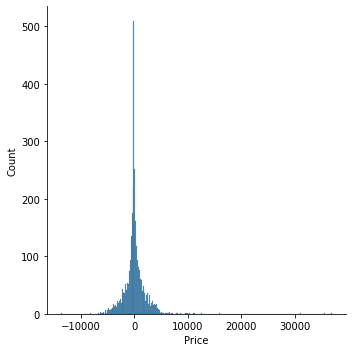

In [72]:
# This type of graph shows that the accuracy of the model is good..
sns.displot(yts-prediction)
plt.show()

# saving the model using pickle

In [73]:
import pickle
with open('flight_price.pkl', 'wb') as f:
    pickle.dump(model,f)

In [74]:
with open('flight_price.pkl', 'rb') as f:
    yy = pickle.load(f)

In [75]:
yy

RandomForestRegressor()